# Семинар 8. Степенной метод. QR алгоритм

## Экспериментально посмотрим на сходимость степенного метода

$$x_{k+1} = \frac{Ax_k}{\|Ax_k\|} $$

- Теоретическая скорость сходимости **линейная** с фактором $\frac{|\lambda_2|}{|\lambda_1|}$

In [1]:
import numpy as np

def power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv = [x.copy()]
    for i in range(max_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        conv.append(x)
        eigval = x @ (A @ x)
        res = A @ x - eigval * x
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv

### Симметричная положительно определённая матрица

In [24]:
# np.random.seed(0)
n = 10
A = np.random.randn(n, n)
A = A.T @ A

true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
# print(true_eigvec)
print(np.linalg.norm(A @ true_eigvec - true_eigvec @ np.diag(true_eigvals)))

[7.39073159e-03 1.79384936e-01 9.98018336e-01 2.10442409e+00
 5.98501241e+00 1.07734671e+01 1.70117902e+01 1.93559427e+01
 2.50102009e+01 3.05754654e+01]
3.1868715008915894e-14


In [25]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 2000, 1e-10)
print(max_eigvec)
print(max_eigval)

[ 0.19070188  0.30771288  0.31580504  0.01139306  0.58154055 -0.65030198
 -0.00224585 -0.02113484 -0.00737849 -0.08657197]
30.575465418598437


-1.0000000000060847


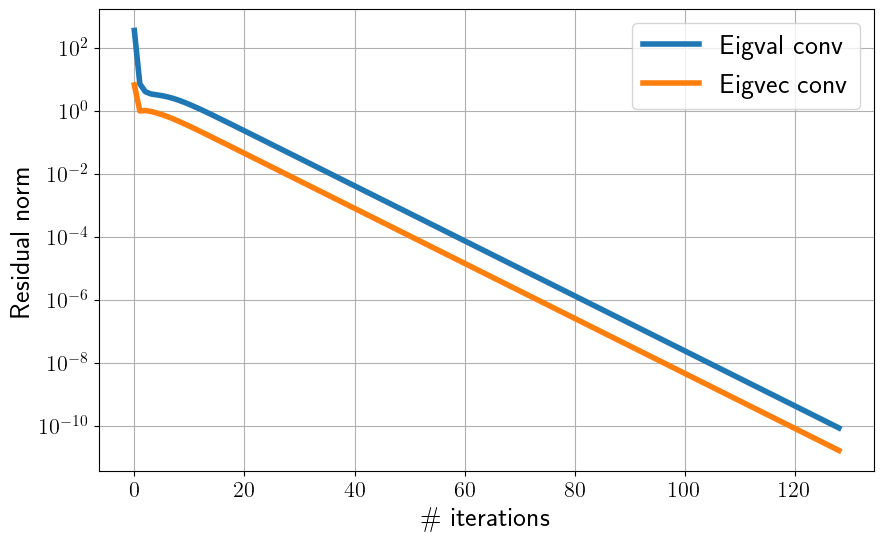

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")
power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, -1] * true_eigvec[:, -1]) for x in conv])
print(conv[-1][0] / true_eigvec[0, -1])
# power_method_eigvec_conv = np.array([np.linalg.norm(x - true_eigvec[:, -1]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [36]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
print(true_eigvals[-2] / true_eigvals[-1])

[0.02021636 0.56321627 0.85119879 0.94041025 0.93692507 0.9181691
 0.89696797 0.87746601 0.8613191  0.84881299 0.83954837 0.83288904
 0.82819998 0.82494464 0.82270659 0.82117836 0.82013979 0.81943639
 0.81896116 0.81864066 0.81842482 0.8182796  0.81818198 0.8181164
 0.81807237 0.81804282 0.818023   0.8180097  0.81800078 0.81799481
 0.8179908  0.81798812 0.81798632 0.81798511 0.81798431 0.81798377
 0.81798341 0.81798316 0.817983   0.81798289 0.81798282 0.81798277
 0.81798274 0.81798272 0.8179827  0.81798269 0.81798269 0.81798268
 0.81798268 0.81798268 0.81798268 0.81798267 0.81798267 0.81798267
 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267
 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267
 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267
 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267
 0.81798267 0.81798267 0.81798267 0.81798267 0.81798267 0.81798268
 0.81798267 0.81798267 0.81798267 0.81798267 0.81798268 0.817982

### Симметричная матрица

- Cобственные значений вещественные

In [37]:
n = 10
A = np.random.randn(n, n)
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[-7.70748699 -6.42622673 -4.82108472 -2.09062476 -0.68385854  0.10757602
  1.76068357  2.96747484  5.23304162  7.50876384]
[[-0.02602068 -0.65653102  0.03157497 -0.17461715  0.03872553  0.27004849
  -0.40468701  0.53791017 -0.09454971  0.01781542]
 [ 0.022913    0.11087696 -0.70286734 -0.24696992  0.05348833 -0.22411595
   0.14220442  0.32570029 -0.02334341 -0.50222305]
 [ 0.05772835  0.08431207  0.34836329  0.29322259 -0.33815689 -0.03392727
  -0.3372617  -0.0233083  -0.09002021 -0.73778651]
 [ 0.18287383 -0.03503585 -0.39206911  0.27806297 -0.614921    0.0303208
  -0.22403509  0.01704178  0.48779315  0.25849752]
 [ 0.70139418 -0.10784141 -0.02542731 -0.44624879 -0.19411097  0.29258534
   0.08774757 -0.3419403  -0.20750085 -0.07528113]
 [ 0.51125071  0.27350224  0.17826704 -0.0954317   0.40406999 -0.37015271
  -0.41576718  0.21228176  0.30937063  0.09492745]
 [ 0.07875179  0.15040967  0.37302853 -0.21076884 -0.47669732 -0.2544886
   0.40807058  0.543992   -0.09707217  0.15402797]
 [-0

In [42]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 400, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.02601637  0.02279155  0.05754993  0.18293633  0.70137595  0.51127365
  0.07878903 -0.15639737 -0.30962334 -0.28664012]
-7.707486104635984


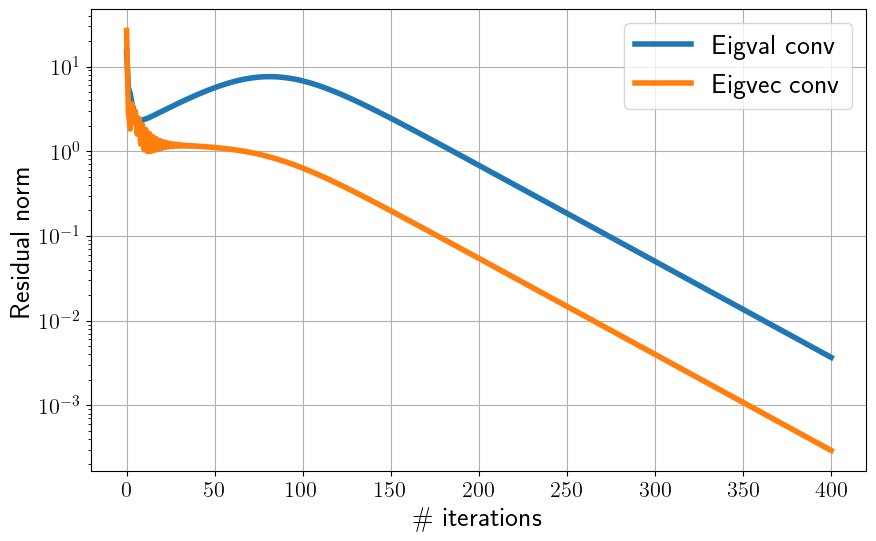

In [43]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [45]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.37213015 0.85191932 0.78059732 0.80953466 0.86649047 0.92400314
 0.96568336 0.9906581  1.00454479 1.01228388 1.01677337 1.01950581
 1.02123441 1.02235333 1.02308235 1.02355253 1.0238465  1.02401849
 1.02410491 1.02413058 1.02411253 1.02406243 1.02398831 1.02389565
 1.02378817 1.02366836 1.02353788 1.02339777 1.02324868 1.02309097
 1.02292478 1.02275014 1.02256695 1.02237506 1.02217427 1.02196435
 1.02174503 1.02151603 1.02127707 1.02102786 1.02076809 1.02049747
 1.02021571 1.01992252 1.01961762 1.01930073 1.01897159 1.01862996
 1.0182756  1.0179083  1.01752788 1.01713415 1.01672697 1.01630624
 1.01587185 1.01542377 1.01496197 1.01448646 1.01399732 1.01349464
 1.01297856 1.01244928 1.01190702 1.01135208 1.01078479 1.01020553
 1.00961473 1.00901287 1.00840049 1.00777815 1.0071465  1.00650619
 1.00585795 1.00520251 1.00454067 1.00387325 1.0032011  1.0025251
 1.00184614 1.00116513 1.000483   0.99980068 0.99911909 0.99843917
 0.99776182 0.99708797 0.99641848 0.99575422 0.99509602 0.99444

## Несимметричная матрица

In [46]:
A = np.random.randn(n, n)

true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec)

[ 2.77796955+1.0633868j   2.77796955-1.0633868j   0.93980451+2.35504709j
  0.93980451-2.35504709j -0.69705919+1.19513994j -0.69705919-1.19513994j
 -2.11176452+0.87135625j -2.11176452-0.87135625j -1.46057309+0.j
 -1.38180781+0.j        ]
[1.38180781 1.3835646  1.3835646  1.46057309 2.28447173 2.28447173
 2.53564179 2.53564179 2.97454304 2.97454304]
[[-0.046001  -0.16492167j -0.046001  +0.16492167j  0.32904695+0.28184693j
   0.32904695-0.28184693j  0.27901165+0.12918583j  0.27901165-0.12918583j
   0.2839935 +0.21366855j  0.2839935 -0.21366855j  0.27917547+0.j
   0.20848718+0.j        ]
 [ 0.12109706-0.27049846j  0.12109706+0.27049846j -0.09182368+0.06724866j
  -0.09182368-0.06724866j -0.07722043+0.40852739j -0.07722043-0.40852739j
  -0.01556762+0.12152757j -0.01556762-0.12152757j  0.40264611+0.j
   0.45732752+0.j        ]
 [-0.13140796+0.1475136j  -0.13140796-0.1475136j   0.03689207+0.20484147j
   0.03689207-0.20484147j  0.25470955+0.23298935j  0.25470955-0.23298935j
   0.1046966 +0.4647

In [47]:
x0 = np.random.randn(n) + 1j * np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 4000, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.0792238 +0.0207852j  -0.13040689+0.0375875j   0.15770432-0.02166081j
  0.13336218-0.04100855j -0.48772674-0.0231692j   0.03151091+0.00213035j
  0.31670892+0.04797205j  0.2522774 +0.0116977j  -0.19101066-0.01999072j
  0.69806515-0.00937478j]
(2.5233925308177274+0.10657497123024397j)


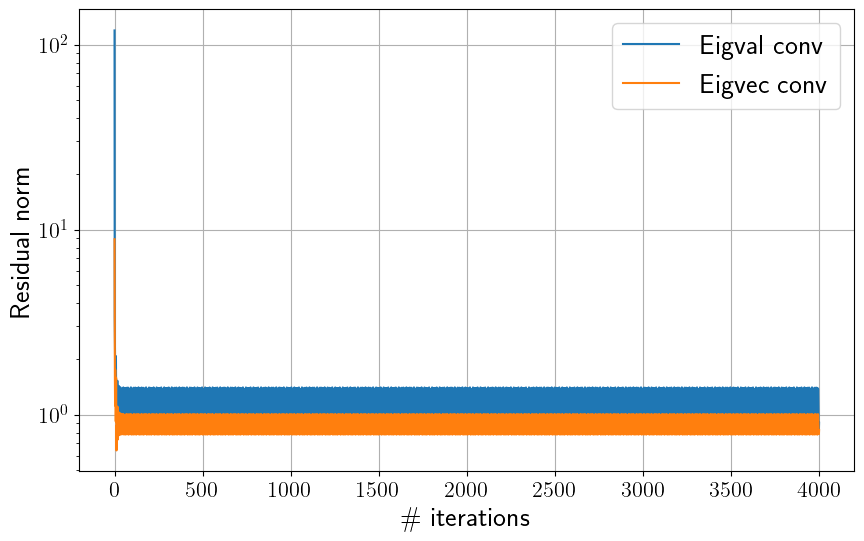

In [48]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [49]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.0281102  0.73341072 0.81492455 ... 0.87635015 0.97713725 1.09713439]
[0.32474917 0.55026235 0.7364585  ... 0.94850006 0.99801374 1.05062018]
1.0


### Если $\lambda^*_2 = \lambda_1$, то степенной метод осциллирует и не сходится! 

## Степенной метод для максимального сингулярного числа

In [50]:
def max_singular_value(A, x0, max_iter, eps):
    x = x0.copy()
    conv_x = []
    conv_y = []
    for i in range(max_iter):
        y = A @ x
        y = y / np.linalg.norm(y)
        conv_y.append(y.copy())
        x = A.T @ y
        x = x / np.linalg.norm(x)
        conv_x.append(x.copy())
        singval = y @ (A @ x)
        res = A @ x - singval * y
        if np.linalg.norm(res) < eps:
            break
    return x, y, singval, conv_x, conv_y

In [52]:
m = 100
n = 100
max_iter = 20000
A = np.random.randn(m, n)
x0 = np.random.randn(n)
u, v, sigma, conv_x, conv_y = max_singular_value(A, x0, max_iter, 1e-4)
U, s, V = np.linalg.svd(A, full_matrices=False)

max_eigvec, max_eigval, conv = power_method(A.T @ A, x0, max_iter, 1e-4)

In [53]:
print(sigma)
print(s[0])
print(np.sqrt(max_eigval))

19.83458414891807
19.834584164847644
19.83458416480751


In [54]:
print(np.sqrt([1:] / power_method_singval_conv[:-1]))
print(s[1] / s[0])

NameError: name 'power_method_singval_conv' is not defined

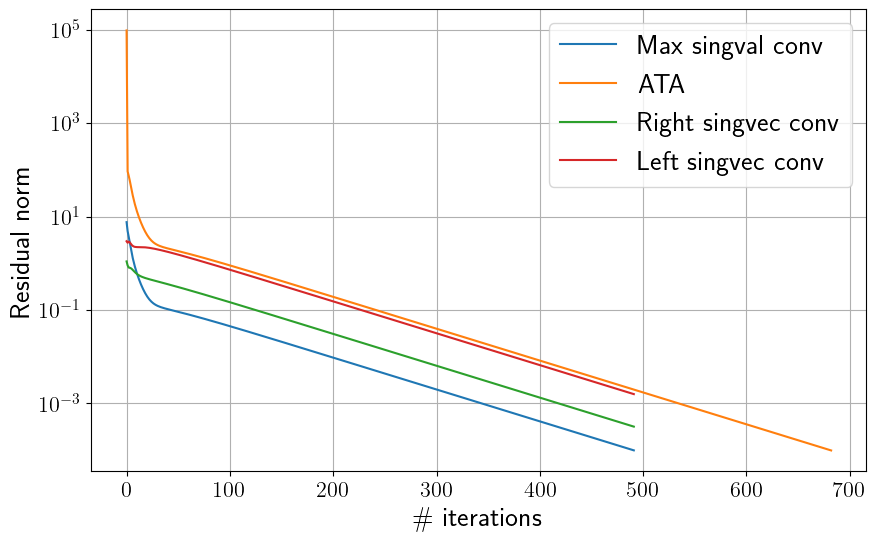

In [55]:
power_method_singval_conv = np.array([np.linalg.norm(A @ x - y @ (A @ x) * y) for x, y in zip(conv_x, conv_y)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_singval_conv, label="Max singval conv")

plt.plot(np.array([np.linalg.norm(A.T @ A @ x - x @ (A.T @ A @ x) * x) for x in conv]), label="ATA")

power_method_rightsingvec_conv = np.array([np.linalg.norm(x - x[0] / V[0, 0] * V[0, :].ravel()) for x in conv_x])
plt.plot(power_method_rightsingvec_conv, label="Right singvec conv")

power_method_leftsingvec_conv = np.array([np.linalg.norm(y - y[0] / U[0, 0] * U[:, 0]) for y in conv_y])
plt.plot(power_method_leftsingvec_conv, label="Left singvec conv")

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

## Другие проблемные случаи для поиска максимального по модулю собственного значения

1) $\lambda_1 = \lambda_2$

2) $\lambda_1 = -\lambda_2$

### Если $\lambda_1 = \lambda_2$ 

In [57]:
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, 2] + list(np.random.rand(n - 2))) @ Q.T

In [58]:
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[0.01661293 0.02275014 0.04790821 0.05352081 0.05705564 0.07183168
 0.09208002 0.09291322 0.10218581 0.10429615 0.11179339 0.13488506
 0.13648527 0.13689332 0.14238272 0.14269603 0.15618596 0.1643748
 0.18534667 0.20234011 0.20364611 0.21510848 0.24281213 0.25639146
 0.25713387 0.26003216 0.26062114 0.26211065 0.26447332 0.28546025
 0.28694918 0.29703089 0.31773536 0.33354722 0.33575584 0.36614199
 0.36860938 0.37206311 0.38983466 0.39016471 0.40316143 0.43585127
 0.44523103 0.44793551 0.48864028 0.49367354 0.50549805 0.51895702
 0.52515577 0.54594884 0.55156627 0.55439177 0.5644181  0.56648416
 0.5872735  0.59558736 0.59690139 0.59803537 0.60107381 0.60641403
 0.61758397 0.6195395  0.63205714 0.67943263 0.7007395  0.71850664
 0.72240094 0.72891834 0.7387963  0.74586844 0.75118396 0.75323705
 0.75454209 0.75781087 0.76353512 0.78797594 0.79480075 0.80967821
 0.81298978 0.8546562  0.86509842 0.87911855 0.88471436 0.88480196
 0.90918131 0.91777521 0.91779358 0.93262142 0.93286392 0.93331

In [59]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 1000, 1e-6)
print(max_eigvec, np.linalg.norm(max_eigvec))
print(max_eigval)

[ 0.01038059 -0.09729468 -0.04468083 -0.0031316   0.0414842   0.05287104
  0.15688537 -0.12821257 -0.10942757 -0.03575568 -0.06065896 -0.06626572
 -0.13114358 -0.145375   -0.0149495  -0.17478824 -0.0316802  -0.12309571
  0.0482777  -0.01921573 -0.07120258  0.00873647  0.14911062 -0.10296675
 -0.04953824  0.03079626  0.01262974  0.07049565 -0.12359647 -0.03442166
 -0.02525151  0.02783963 -0.15537113 -0.06486951  0.0550137   0.10134353
  0.06636336 -0.02797205 -0.15911622  0.04693105  0.03388863 -0.10395747
 -0.10019946 -0.00268686  0.04093915 -0.12510999 -0.01102894  0.15466175
  0.21524823  0.00665047 -0.17054615 -0.01464208  0.04751307 -0.04178116
 -0.08993092  0.00660319  0.09600095  0.04158698 -0.13418982  0.03202615
 -0.02959678 -0.04337718  0.03946213  0.09105506 -0.01576339 -0.1664216
 -0.00962428  0.05931885 -0.06412163 -0.05967462 -0.09314324  0.06363396
 -0.20849752  0.01114328  0.00830693  0.22026664  0.29207881 -0.01761959
 -0.02906182 -0.06091299  0.09716399  0.11501671  0.

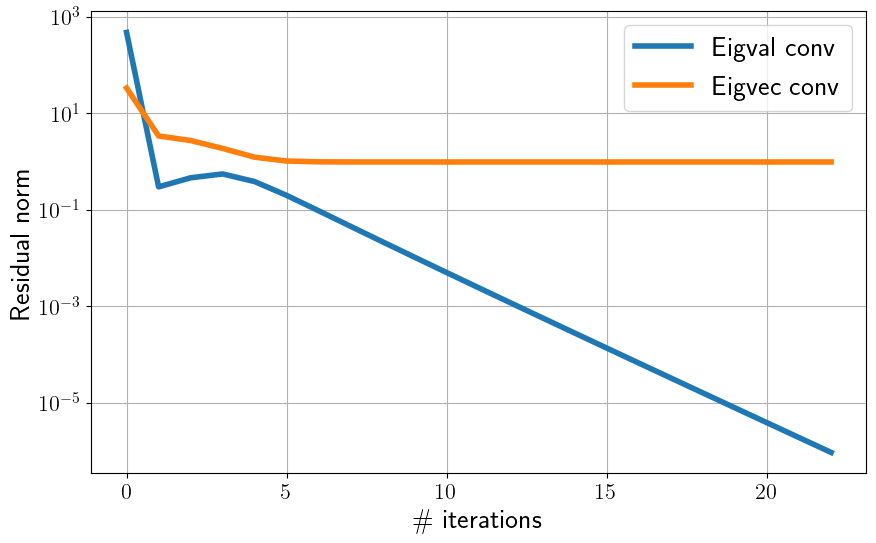

In [60]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [61]:
alpha = np.linalg.lstsq(true_eigvec[:, n-2:], max_eigvec, rcond=None)[0]
print(alpha)

[-0.98170466  0.19040998]


In [62]:
print("Accuracy = {}".format(np.linalg.norm(true_eigvec[:, n-2:] @ alpha - max_eigvec)))

Accuracy = 9.107376898825919e-07


### Если $\lambda_1 = -\lambda_2$

In [63]:
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, -2] + list(np.random.rand(n - 2))) @ Q.T

In [64]:
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[-2.          0.01798304  0.02500904  0.03252415  0.04314539  0.05344137
  0.05584287  0.09072294  0.11362957  0.11504349  0.11540969  0.12109028
  0.12237405  0.13346209  0.15312083  0.16091562  0.16620032  0.16747014
  0.16893569  0.17310829  0.17593571  0.17811172  0.19013504  0.1950758
  0.20489754  0.20720294  0.20809397  0.21714049  0.23689873  0.24170879
  0.25625761  0.26276903  0.28297178  0.31809668  0.3312113   0.3430977
  0.34344295  0.34705123  0.35940874  0.36540427  0.39236846  0.40449558
  0.44225078  0.47555026  0.49052874  0.4905651   0.51206626  0.52368996
  0.52550282  0.53520655  0.55700533  0.55980147  0.57099042  0.57197922
  0.57713977  0.5858083   0.58671193  0.60120346  0.60456747  0.61365101
  0.61721672  0.62492202  0.62644544  0.62858378  0.64905308  0.65093722
  0.66267683  0.6788978   0.68125819  0.6823614   0.69972419  0.71664041
  0.72001192  0.72163836  0.73173592  0.7437446   0.74584362  0.7654492
  0.77134649  0.79176449  0.79898395  0.80749521  0.81

In [66]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 10000, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.02809732  0.14495131 -0.1084721   0.20048074 -0.02649313 -0.0973878
  0.03689646  0.04326895  0.20106053 -0.08505014 -0.11320221  0.07244461
  0.05089237  0.05468301 -0.15494664  0.11351129  0.05941347  0.00508938
  0.13330676  0.1547619   0.0471556   0.06306603 -0.12365748  0.00400402
 -0.06527193  0.09408956  0.06141927  0.00336243  0.09330028  0.0417428
  0.15867875  0.21918203 -0.06531077  0.04117636 -0.00329792 -0.04062961
 -0.05857206  0.0280242  -0.22768512 -0.17152191  0.14854036  0.01238505
 -0.03292252 -0.03746062  0.01716495  0.20654831  0.01218988 -0.05810835
 -0.19883698  0.09399181 -0.01407584  0.09843637 -0.06402706 -0.02937067
  0.06015426 -0.02819452 -0.08514365  0.00188666  0.18514245 -0.03146988
 -0.07510774 -0.051711    0.06858247 -0.01504142 -0.01057565  0.13428249
  0.03165234  0.08307924  0.02604344 -0.11235989 -0.06668291  0.18172739
 -0.10553033  0.00797249  0.00436641 -0.12087791  0.04732384 -0.01195719
 -0.19285235 -0.04485162 -0.03458111 -0.18828835  0.0

In [67]:
np.linalg.norm(conv[-1] - conv[-2])
power_method_eigvec_conv

array([33.52937627,  3.39903304,  2.73684275,  1.87335792,  1.23296147,
        1.02607632,  0.98825954,  0.98261627,  0.98182553,  0.9817197 ,
        0.98170638,  0.98170485,  0.98170469,  0.98170467,  0.98170466,
        0.98170466,  0.98170466,  0.98170466,  0.98170466,  0.98170466,
        0.98170466,  0.98170466,  0.98170466])

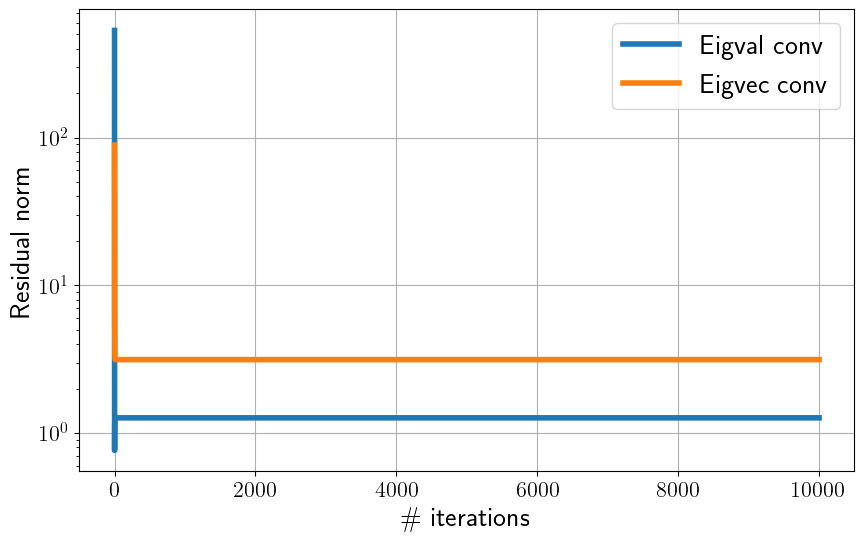

In [68]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

## Блочный степенной метод

- Ищем $k$ cтарших собственных значения и вектора
- Этапы аналогичны степенному методу для максимального по модулю собственного значения
    - Умножение матрицы на набор векторов
    - Аналог нормализации для матриц?

In [82]:
def block_power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv_vec = [x]
    conv_val = [np.einsum('ik,ij,jk->k',x, A, x)]
    for i in range(max_iter):
        x = A @ x
        x, _ = np.linalg.qr(x)
        conv_vec.append(x)
        eigval = np.einsum('ik,ij,jk->k', x.conj(), A, x)
        conv_val.append(eigval)
        res = A @ x - (eigval[:, np.newaxis] * x.T).T
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv_vec, conv_val

### Немного про einsum

In [83]:
A = np.random.randn(n, n)
print(np.trace(A), np.einsum('ii', A))
print(np.diag(A) - np.einsum("ii->i", A))
print(np.einsum("ij->j", A) - np.sum(A, axis=0))

-4.812850708940006 -4.812850708940006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [84]:
x = np.random.randn(n)
print(A @ x - np.einsum('ij,j', A, x))

[-4.44089210e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.44089210e-16  0.00000000e+00  4.44089210e-16  0.00000000e+00
  2.22044605e-16  0.00000000e+00]


In [72]:
B = np.random.randn(n, n)
print(np.diag(A @ B) - np.einsum('ij,ji->i', A, B))

[ 8.88178420e-16  0.00000000e+00  0.00000000e+00 -8.88178420e-16
  0.00000000e+00  1.11022302e-16  0.00000000e+00 -8.88178420e-16
 -3.55271368e-15  8.88178420e-16 -1.77635684e-15 -1.77635684e-15
 -2.66453526e-15  0.00000000e+00  0.00000000e+00  1.77635684e-15
  8.88178420e-16  4.44089210e-16  6.66133815e-16  3.55271368e-15
  8.88178420e-16  1.77635684e-15  0.00000000e+00  8.88178420e-16
 -3.55271368e-15 -3.10862447e-15 -3.55271368e-15  0.00000000e+00
  0.00000000e+00  1.77635684e-15 -5.32907052e-15  0.00000000e+00
 -2.66453526e-15 -2.35922393e-16 -8.88178420e-16 -4.44089210e-16
  0.00000000e+00 -3.55271368e-15  3.55271368e-15  3.55271368e-15
  1.77635684e-15 -3.55271368e-15 -8.88178420e-16  8.88178420e-16
  1.77635684e-15  2.66453526e-15  5.32907052e-15  0.00000000e+00
  1.77635684e-15 -8.88178420e-16 -1.22124533e-15  4.44089210e-16
 -1.77635684e-15 -5.32907052e-15 -2.72004641e-15 -2.66453526e-15
  1.33226763e-15  0.00000000e+00 -1.33226763e-15  1.77635684e-15
 -1.77635684e-15  3.55271

### Более подробное об этой операции см. [тут](https://obilaniu6266h16.wordpress.com/2016/02/04/einstein-summation-in-numpy/)

## Вернёмся к блочному степенному методу

In [85]:
block_size = 3
n = 10
A = np.random.randn(n, n)
A = A.T @ A
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[ 0.03657619  1.01634352  1.82970399  3.01061354  4.00973681  7.05844445
  8.30705007 11.81789414 22.32672099 26.26791503]
[[-2.21403891e-01 -2.97093948e-01  4.48949374e-01  3.93245908e-01
  -1.56190081e-01  4.75842608e-01 -1.97543579e-01  3.53492225e-01
   2.50474002e-03 -3.02835923e-01]
 [-1.28281857e-01  1.91545662e-01 -7.62741968e-01  1.09914636e-01
  -2.30445145e-01  3.83317043e-01 -2.42063030e-01  2.29680605e-01
  -1.93889213e-01  6.34022788e-02]
 [-3.45484151e-01  1.97703942e-01 -1.42396470e-01 -1.37622800e-01
  -1.46915493e-01 -3.97568274e-01 -9.76523530e-02  6.49188038e-02
   2.51991355e-01 -7.38540650e-01]
 [ 1.99590510e-01  4.91314740e-01  3.54274562e-01 -1.55532710e-01
  -2.30532204e-01 -1.85267682e-01 -2.44698832e-01  2.76469178e-01
  -5.87614063e-01  5.84950172e-04]
 [ 1.56555026e-01  1.93568286e-01  2.90755595e-02 -3.30889518e-01
   6.44827011e-01  4.46064791e-01 -2.92132384e-01 -1.59484097e-01
  -2.71850315e-02 -3.18429546e-01]
 [-2.67293433e-01  2.78341227e-01  1.27727

In [86]:
x0 = np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 5000, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-3.02835923e-01  2.50478954e-03  3.53492225e-01]
 [ 6.34022471e-02 -1.93889224e-01  2.29680605e-01]
 [-7.38540609e-01  2.51991476e-01  6.49188038e-02]
 [ 5.84854085e-04 -5.87614063e-01  2.76469178e-01]
 [-3.18429551e-01 -2.71849795e-02 -1.59484097e-01]
 [-1.96759514e-02  9.85862106e-03  3.94836336e-02]
 [ 2.33939483e-01 -2.74416856e-02  7.27486336e-02]
 [-1.23780468e-01 -3.77004793e-01 -8.19171038e-01]
 [ 3.27779457e-01  6.14536070e-01 -1.69749632e-01]
 [ 2.82054614e-01 -1.79538985e-01  9.74565703e-02]]
[26.26791503 22.32672099 11.81789414]
[[-3.02835923e-01  2.50474002e-03  3.53492225e-01]
 [ 6.34022788e-02 -1.93889213e-01  2.29680605e-01]
 [-7.38540650e-01  2.51991355e-01  6.49188038e-02]
 [ 5.84950172e-04 -5.87614063e-01  2.76469178e-01]
 [-3.18429546e-01 -2.71850315e-02 -1.59484097e-01]
 [-1.96759530e-02  9.85861784e-03  3.94836336e-02]
 [ 2.33939487e-01 -2.74416473e-02  7.27486336e-02]
 [-1.23780406e-01 -3.77004813e-01 -8.19171038e-01]
 [ 3.27779356e-01  6.14536124e-01 -1.697496

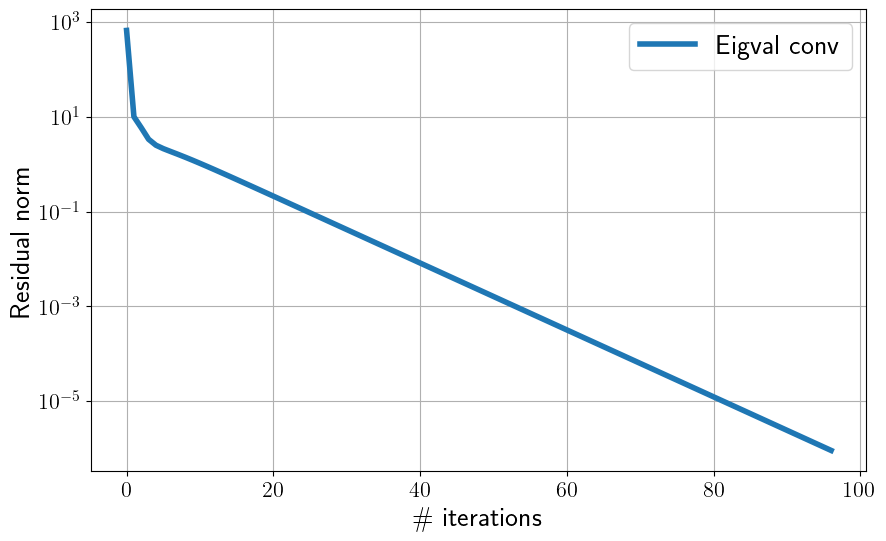

In [87]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [89]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(true_eigvals[-4] / true_eigvals[-3])
print(true_eigvals[-1], true_eigvals[-2], true_eigvals[-3])

[0.01512663 0.58528728 0.57148472 0.74947958 0.84658307 0.87012329
 0.87154909 0.8680274  0.86400451 0.86054863 0.85782249 0.85574829
 0.85419889 0.85305364 0.85221265 0.85159772 0.8511494  0.85082319
 0.85058619 0.85041417 0.85028942 0.85019899 0.85013348 0.85008602
 0.85005166 0.85002679 0.85000879 0.84999576 0.84998633 0.84997951
 0.84997457 0.849971   0.84996842 0.84996655 0.8499652  0.84996422
 0.84996352 0.84996301 0.84996264 0.84996237 0.84996218 0.84996204
 0.84996194 0.84996186 0.84996181 0.84996177 0.84996174 0.84996172
 0.84996171 0.8499617  0.84996169 0.84996169 0.84996168 0.84996168
 0.84996168 0.84996168 0.84996168 0.84996167 0.84996167 0.84996167
 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167
 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167
 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167
 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167
 0.84996167 0.84996167 0.84996167 0.84996167 0.84996167 0.8499

### Несимметричный случай

In [100]:
A = np.random.randn(n, n)

# A = np.random.randn(n, n)
# Q, _ = np.linalg.qr(A)
# A = Q @ np.diagflat([2, 2, 2] + list(np.random.rand(n - 3))) @ Q.T

In [101]:
true_eigvals, true_eigvec = np.linalg.eig(A)
block_size = 3
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec.round(5))

[ 1.77838402+0.j          0.93061003+1.64881797j  0.93061003-1.64881797j
  0.36405184+1.50757622j  0.36405184-1.50757622j -2.39239307+1.90952109j
 -2.39239307-1.90952109j -2.03085728+0.79684527j -2.03085728-0.79684527j
 -1.63070763+0.j        ]
[1.55090934 1.55090934 1.63070763 1.77838402 1.89331343 1.89331343
 2.181592   2.181592   3.06101542 3.06101542]
[[ 0.16725+0.j       0.24781-0.32554j  0.24781+0.32554j  0.08857-0.03283j
   0.08857+0.03283j  0.27651+0.24147j  0.27651-0.24147j  0.26001+0.22197j
   0.26001-0.22197j -0.05989+0.j     ]
 [-0.07259+0.j      -0.09253-0.21829j -0.09253+0.21829j  0.17298+0.20645j
   0.17298-0.20645j  0.22582-0.28573j  0.22582+0.28573j  0.12599-0.14605j
   0.12599+0.14605j -0.35473+0.j     ]
 [ 0.24306+0.j       0.274  -0.07106j  0.274  +0.07106j -0.01268+0.28642j
  -0.01268-0.28642j  0.44529+0.j       0.44529-0.j       0.53857+0.j
   0.53857-0.j       0.24987+0.j     ]
 [-0.40418+0.j       0.50947+0.j       0.50947-0.j      -0.09891-0.0875j
  -0.09891+0.

In [102]:
x0 = np.random.randn(n, block_size) #+ 1j * np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.02648468 -0.54028714 -0.08021747]
 [ 0.5116045   0.1111582  -0.11784754]
 [ 0.38671461 -0.42527705 -0.42658334]
 [ 0.20876192  0.03932758  0.39798047]
 [-0.2506061  -0.30354552  0.39058536]
 [-0.32249984 -0.10819291  0.01398844]
 [-0.31640458 -0.1766839  -0.58967561]
 [ 0.50401439 -0.04008155  0.0094765 ]
 [-0.14563592  0.23792601 -0.26532117]
 [-0.04762274  0.56572814 -0.26145795]]
[-2.7966398  -1.98814634 -2.10616987]
[[-0.05989283+0.j          0.26001463-0.22197304j  0.26001463+0.22197304j]
 [-0.35472986+0.j          0.12598943+0.14604759j  0.12598943-0.14604759j]
 [ 0.24987074+0.j          0.53857195-0.j          0.53857195+0.j        ]
 [-0.41344602+0.j         -0.24064811+0.3021687j  -0.24064811-0.3021687j ]
 [-0.20054798+0.j         -0.20970161-0.25719187j -0.20970161+0.25719187j]
 [ 0.0160143 +0.j         -0.00804659+0.04895739j -0.00804659-0.04895739j]
 [ 0.71775062+0.j          0.42264587-0.25303421j  0.42264587+0.25303421j]
 [ 0.06270898+0.j          0.08875433+0.041465

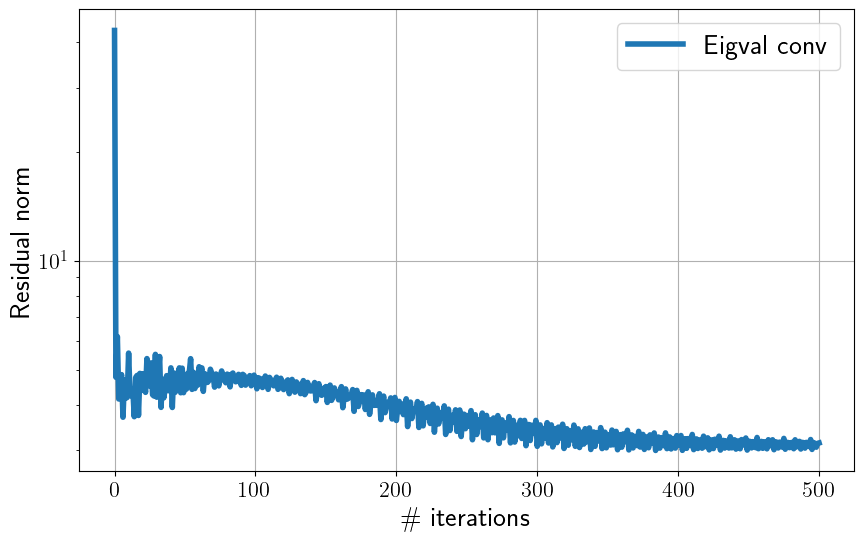

In [99]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

#### Какие собственные значения удаётся восстановить, а какие нет?

## Резюме

- Сходимость степенного метода
- Аналог степенного метода для задачи поиска максимального сингулярного значения
- Блочный степенной метод 
- Операция ```einsum``` и эффективный способ вычисления диагонали произведения матриц

In [36]:
def qr_alg(A0, num_iter):
    A = A0.copy()
    Q_final = np.eye(A0.shape[0])
    for i in range(num_iter):
        Q, R = np.linalg.qr(A)
        A = R @ Q 
        Q_final =  Q_final @ Q
    return A, Q_final

In [38]:
n = 10
A = np.random.randn(n, n)
# A = A + A.T
print(np.linalg.eigvals(A))

[ 1.27075975+3.0561721j   1.27075975-3.0561721j  -2.72710537+0.82050939j
 -2.72710537-0.82050939j -2.63537864+0.j          3.87525392+0.j
  2.20959822+0.j          0.35461699+0.j          1.25147209+0.j
  0.7367227 +0.j        ]


In [39]:
A1, Q = qr_alg(A, 1000)
np.linalg.norm(A - Q @ A1 @ Q.T)

1.0602622619310265e-13

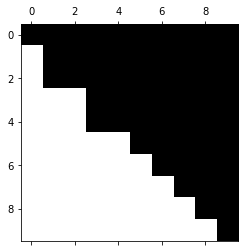

In [40]:
plt.spy(A1, precision=1e-6)

In [27]:
np.sort(np.diag(A1))

array([-5.00567732, -3.48489466, -2.84820024, -0.22582634,  0.63781262,
        1.91055137,  3.22759867,  5.48158898,  6.8607816 ,  7.79742665])

In [41]:
A1[1:3, 1:3]

array([[ 1.84140529,  3.08910836],
       [-3.12900134,  0.7001142 ]])

In [42]:
A1[0, 0]

3.875253921748824

In [44]:
A1[:3, :3]

array([[ 3.87525392e+00,  1.19190502e-01, -3.91816971e-01],
       [ 4.38357893e-68,  1.84140529e+00,  3.08910836e+00],
       [-2.79732449e-69, -3.12900134e+00,  7.00114205e-01]])

In [45]:
np.linalg.eigvals(A1[1:3, 1:3])

array([1.27075975+3.0561721j, 1.27075975-3.0561721j])